In [2]:
import pandas as pd
import numpy as np

## **Read and Store data**

In [3]:
import os

main_directory = '/content/drive/MyDrive/old_data'

# Get a list of all folders in the main directory
folders = [folder for folder in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, folder))]

# Dictionary to store DataFrames
tickets, flights = {}, {}

# Iterate over each folder
for folder in folders:
    # Construct the path to the CSV
    csv_path_ticket = os.path.join(main_directory, folder, 'ticket.csv')
    csv_path_flight = os.path.join(main_directory, folder, 'flight.csv')

    # Check if the CSV file exists
    if os.path.exists(csv_path_ticket):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_path_ticket)

        # Store the DataFrame in the dictionary with the folder name as the key
        tickets[folder] = df

    else:
        print(f'ticket not found in {folder}')

        # Check if the CSV file exists
    if os.path.exists(csv_path_flight):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_path_flight)

        # Store the DataFrame in the dictionary with the folder name as the key
        flights[folder] = df

    else:
        print(f'flight not found in {folder}')

,ticket_id,flight_id,purchase_date,class,price
0,0a18f98ff00a462760bd70516f3e900bd5b0ecf3bff99b...,c45645fc442926434e54d4ad71966a4f7cd2420ccf7a8f...,2022-10-20,Economy,297.0
1,edf369fd16114b4c4c9921c5b6cba3e902798f13f5dc1e...,909459dcc544dec6216b232c0426e4e5dba71aae70214e...,2022-10-20,Economy,373.0
2,e10b3db68e4474b73aa5ba7f17ddee8a3a1ab50e6436df...,9cd975325830680a6189efaa693a96c3fed69433d69ddb...,2022-10-20,Economy,373.0
3,398a0aa23f2f5ee187267d9d1533d0b8be86754a5c858e...,5c690cbaed69c4ac2b03b1fe10aa91a9b0eb0b4ba84c3f...,2022-10-20,Economy,NaN
4,bc1a91f2d14d6ae986ef6cb33b950456888ade7dd37c65...,dfb9db781edd1b288b42cf5c7a15c833d94381f4328148...,2022-10-20,Economy,373.0
...,...,...,...,...,...
54388,6d9bf938ed119fe2cc8471e3580fcd034e5324af035bf9...,edeaecbd81a3793a94a8e7814bfe3fef0e6efd51957bff...,2022-10-24,Economy,NaN
54389,414f5f1acebf596e1ac54791f6f5393533462fb3c84d34...,b05199957bc0cb6d210644b65ea8ba8bc860199a9e80c3...,2022-10-24,Economy,NaN
54390,59de1458fcbb2d1e632df4fae9723646fcf413df6d3c68...,b626d64d2bc2536540272a373d6d82e024eec8c2b30c65...,2022-10-24,Economy,NaN
54391,e09b854eda4e5bf5ddcbc10de2d8b7b8dadb10805e637d...,a1d031bdeb7754e2a93146fb5710dc41247e67eabecc52...,2022-10-24,Economy,NaN


## **Data Processing**

### **Join Tickets data and Flights data**

In [4]:
# Dictionary to store joined DataFrames
dfs = {}

# Iterate over each date in tickets_dict
for date, tickets_df in tickets.items():
    # Check if the corresponding date exists in flights_dict
    if date in flights:
        # Perform the join operation on "flight_id"
        joined_df = pd.merge(tickets_df, flights[date], on="flight_id", how="left")

        # Store the joined DataFrame in the new dictionary with the same date as key
        dfs[date] = joined_df
    else:
        print(f'No matching flights found for tickets on {date}')

2022.12.02 <class 'str'>
2022.11.24 <class 'str'>
2022.12.04 <class 'str'>
2022.11.19 <class 'str'>
2022.11.23 <class 'str'>
2022.11.27 <class 'str'>
2022.11.26 <class 'str'>
2022.11.25 <class 'str'>
2022.12.06 <class 'str'>
2022.11.20 <class 'str'>
2022.11.17 <class 'str'>
2022.11.11 <class 'str'>
2022.11.16 <class 'str'>
2022.11.18 <class 'str'>
2022.11.15 <class 'str'>
2022.11.09 <class 'str'>
2022.11.07 <class 'str'>
2022.11.14 <class 'str'>
2022.11.13 <class 'str'>
2022.11.08 <class 'str'>
2022.11.05 <class 'str'>
2022.11.03 <class 'str'>
2022.10.25 <class 'str'>
2022.11.06 <class 'str'>
2022.11.01 <class 'str'>
2022.10.26 <class 'str'>
2022.11.04 <class 'str'>
2022.10.20-24 <class 'str'>
2022.10.27 <class 'str'>
2022.11.02 <class 'str'>


In [10]:
dfs['2022.10.20-24']

,ticket_id,flight_id,purchase_date,class,price,flight_number,airline_code,departure_date,departure_time,arrival_date,arrival_time,travel_time,departure_airport,arrival_airport
0,0a18f98ff00a462760bd70516f3e900bd5b0ecf3bff99b...,c45645fc442926434e54d4ad71966a4f7cd2420ccf7a8f...,2022-10-20,Economy,297.0,NK 1024,NK,2022-10-21,21:59,2022-10-22,00:39,4:40:00,ORD,LAX
1,edf369fd16114b4c4c9921c5b6cba3e902798f13f5dc1e...,909459dcc544dec6216b232c0426e4e5dba71aae70214e...,2022-10-20,Economy,373.0,UA 758,UA,2022-10-21,10:35,2022-10-21,13:00,4:25:00,ORD,LAX
2,e10b3db68e4474b73aa5ba7f17ddee8a3a1ab50e6436df...,9cd975325830680a6189efaa693a96c3fed69433d69ddb...,2022-10-20,Economy,373.0,AA 2364,AA,2022-10-21,17:00,2022-10-21,19:16,4:16:00,ORD,LAX
3,398a0aa23f2f5ee187267d9d1533d0b8be86754a5c858e...,5c690cbaed69c4ac2b03b1fe10aa91a9b0eb0b4ba84c3f...,2022-10-20,Economy,NaN,WN 1766,WN,2022-10-21,12:25,2022-10-21,14:50,4:25:00,MDW,LAX
4,bc1a91f2d14d6ae986ef6cb33b950456888ade7dd37c65...,dfb9db781edd1b288b42cf5c7a15c833d94381f4328148...,2022-10-20,Economy,373.0,UA 2676,UA,2022-10-21,14:12,2022-10-21,16:43,4:31:00,ORD,LAX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277870,6d9bf938ed119fe2cc8471e3580fcd034e5324af035bf9...,edeaecbd81a3793a94a8e7814bfe3fef0e6efd51957bff...,2022-10-24,Economy,NaN,WN 130,WN,2022-12-23,19:15,2022-12-23,20:35,1:20:00,SJC,LAX
277871,414f5f1acebf596e1ac54791f6f5393533462fb3c84d34...,b05199957bc0cb6d210644b65ea8ba8bc860199a9e80c3...,2022-10-24,Economy,NaN,WN 700,WN,2022-12-23,19:35,2022-12-23,21:00,1:25:00,OAK,LAX
277872,59de1458fcbb2d1e632df4fae9723646fcf413df6d3c68...,b626d64d2bc2536540272a373d6d82e024eec8c2b30c65...,2022-10-24,Economy,NaN,WN 1525,WN,2022-12-23,20:40,2022-12-23,22:05,1:25:00,SFO,LAX
277873,e09b854eda4e5bf5ddcbc10de2d8b7b8dadb10805e637d...,a1d031bdeb7754e2a93146fb5710dc41247e67eabecc52...,2022-10-24,Economy,NaN,WN 5935,WN,2022-12-23,20:55,2022-12-23,22:15,1:20:00,OAK,LAX


### **Merge all data to form time series data**

In [6]:
# Concatenate all DataFrames to get the whole dataframe
df = pd.concat(dfs, ignore_index=True)

In [7]:
df_price_by_route = df.groupby(['departure_airport', 'arrival_airport', 'purchase_date'])['price'].agg('mean').reset_index()

In [8]:
len(df_price_by_route)

636

In [9]:
df_price_by_route

,departure_airport,arrival_airport,purchase_date,price
0,BUR,OAK,2022-10-21,335.000000
1,BUR,OAK,2022-10-22,629.000000
2,BUR,SFO,2022-10-21,147.250000
3,BUR,SFO,2022-10-22,286.500000
4,BUR,SJC,2022-10-21,NaN
...,...,...,...,...
631,SNA,OAK,2022-10-22,325.000000
632,SNA,SFO,2022-10-20,235.000000
633,SNA,SFO,2022-10-21,220.000000
634,SNA,SFO,2022-10-22,326.166667


In [10]:
df_price_by_dep = df.groupby(['departure_airport', 'purchase_date'])['price'].agg('mean').reset_index()

In [11]:
len(df_price_by_dep)

209

In [12]:
df_price_by_arr = df.groupby(['arrival_airport', 'departure_date'])['price'].agg('mean').reset_index()

### **Compute average price for each purchase date**

In [13]:
# Print all unique departure airports
df['departure_airport'].unique()

array(['ORD', 'MDW', 'LAX', 'SFO', 'SJC', 'OAK', 'SNA', 'BUR'],
      dtype=object)

#### **Departed from LAX**

In [14]:
df_price_by_dep_la = df_price_by_dep[(df_price_by_dep['departure_airport'] == 'LAX') | (df_price_by_dep['departure_airport'] == 'SNA')].groupby(['purchase_date'])['price'].agg('mean').reset_index()

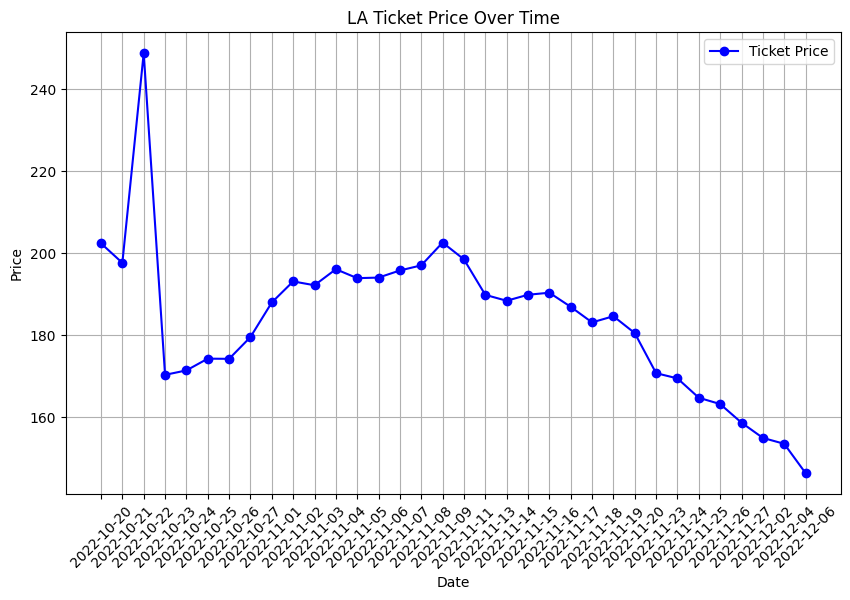

In [15]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

plt.plot(df_price_by_dep_la['purchase_date'], df_price_by_dep_la['price'], label='Ticket Price', color='blue', marker='o')

plt.title('LA Ticket Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
# tilt axis label
plt.xticks(rotation=45)

plt.show()

#### **Departed from CHI**

In [16]:
df_price_by_dep_chi = df_price_by_dep[(df_price_by_dep['departure_airport'] == 'ORD') | (df_price_by_dep['departure_airport'] == 'MDW')].groupby(['purchase_date'])['price'].agg('mean').reset_index()

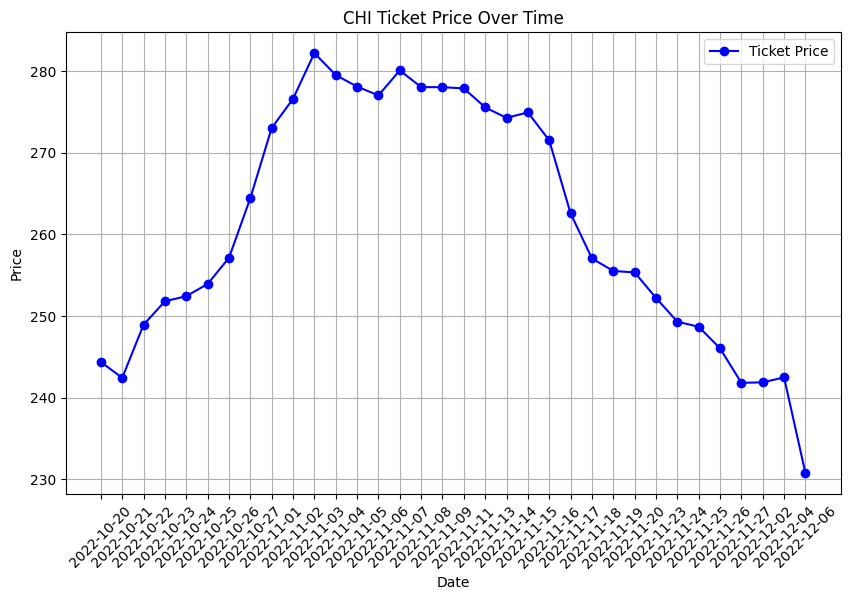

In [17]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

plt.plot(df_price_by_dep_chi['purchase_date'], df_price_by_dep_chi['price'], label='Ticket Price', color='blue', marker='o')

plt.title('CHI Ticket Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
# tilt axis label
plt.xticks(rotation=45)

plt.show()

#### **Departed from San Francisco**

In [18]:
df_price_by_dep_sf = df_price_by_dep[(df_price_by_dep['departure_airport'] == 'SFO') | (df_price_by_dep['departure_airport'] == 'SJC') | (df_price_by_dep['departure_airport'] == 'OAK')].groupby(['purchase_date'])['price'].agg('mean').reset_index()

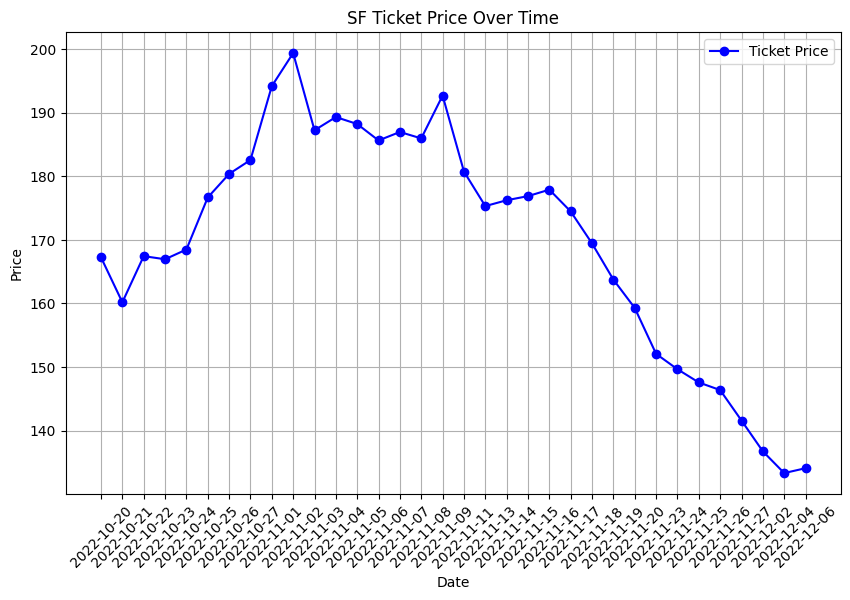

In [19]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

plt.plot(df_price_by_dep_sf['purchase_date'], df_price_by_dep_sf['price'], label='Ticket Price', color='blue', marker='o')

plt.title('SF Ticket Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
# tilt axis label
plt.xticks(rotation=45)

plt.show()

## **Exploratory Analysis**

In [20]:
import matplotlib.pyplot as plt

## **Model**

#### **Predicting price departing from SF**

##### **ARIMA Model**

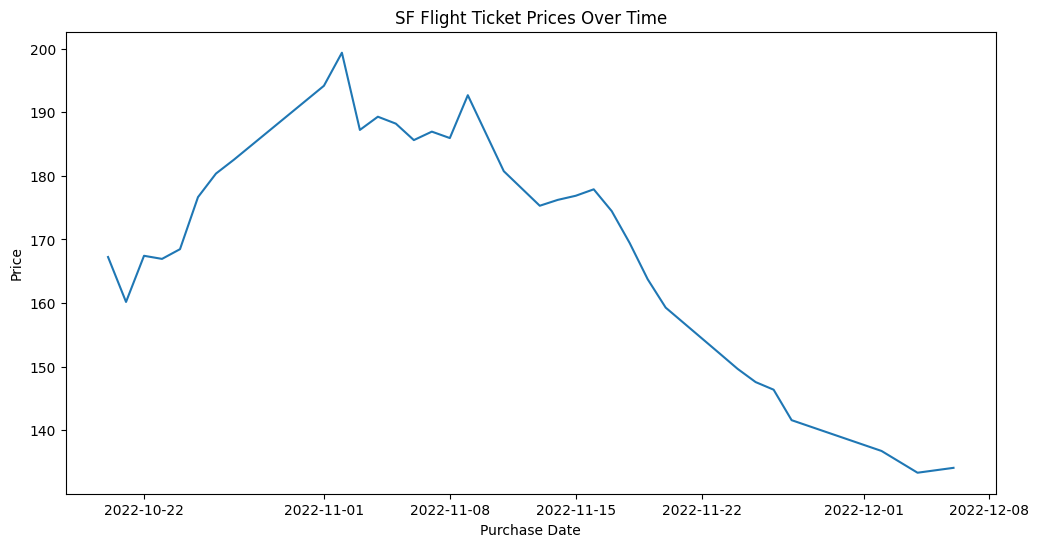

In [21]:
# Import necessary libraries
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load your flight ticket price data (replace 'your_data.csv' with your actual file)
data = df_price_by_dep_sf.reset_index()
data['purchase_date'] = pd.to_datetime(data['purchase_date'])
data.set_index('purchase_date', inplace=True)

# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(data['price'])
plt.title('SF Flight Ticket Prices Over Time')
plt.xlabel('Purchase Date')
plt.ylabel('Price')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Mean Squared Error: 62.91152916543518


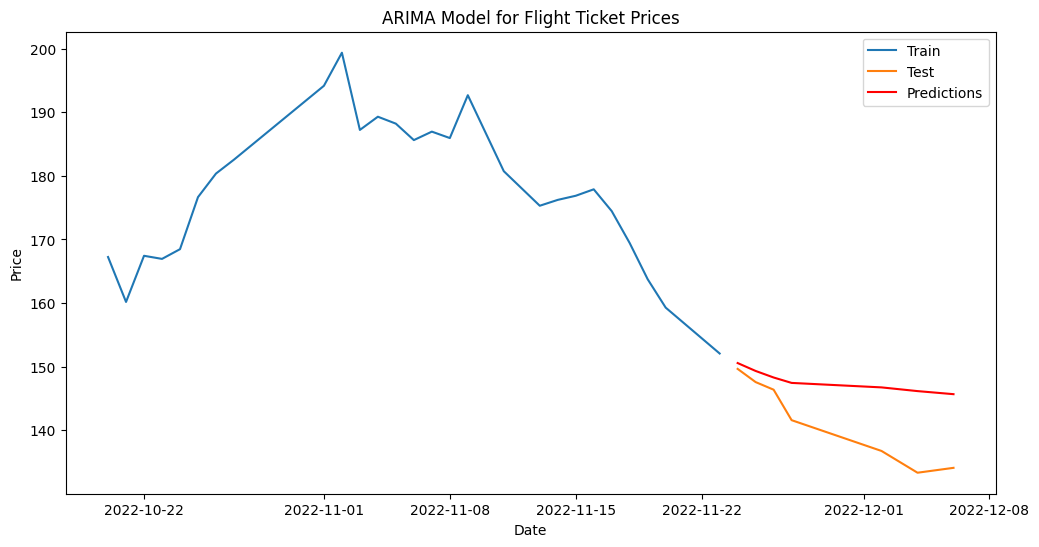

In [22]:
# Train-test split
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Build and train the ARIMA model
order = (1, 1, 1)  # Order parameters (p, d, q)
model = ARIMA(train['price'], order=order)
model_fit = model.fit()

# Forecasting
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Evaluate the model
mse = mean_squared_error(test['price'], predictions)
print(f'Mean Squared Error: {mse}')

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['price'], label='Train')
plt.plot(test.index, test['price'], label='Test')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.title('ARIMA Model for Flight Ticket Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


##### **Cubic Splines**

Cubic Spline Mean Squared Error: 5612.735699253635


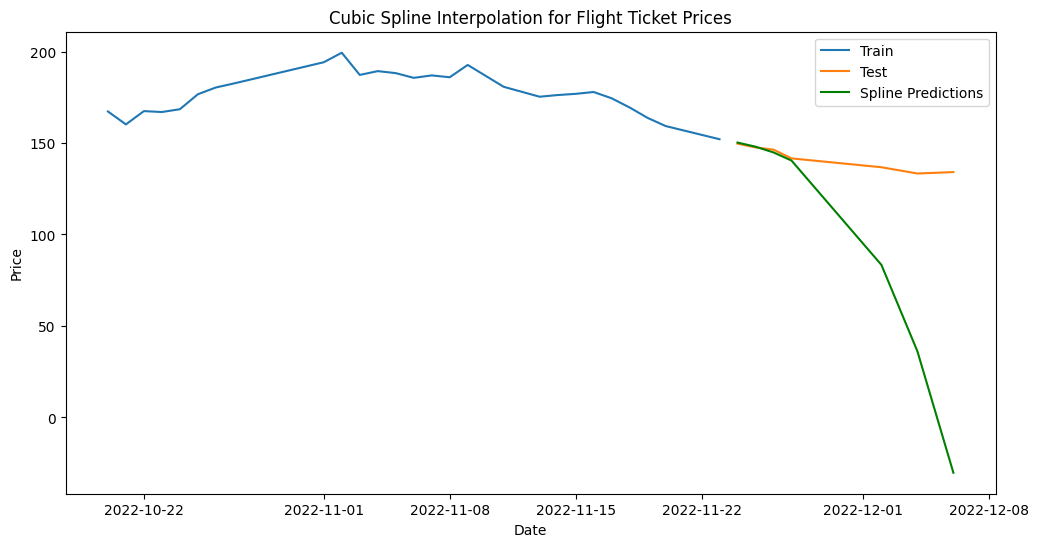

In [28]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Assuming 'train' is your training data with 'price' and 'test' is your test data

# Fit a cubic spline to the training data
spline = CubicSpline(train.index, train['price'], bc_type='natural')

# Generate interpolated values for the test set
spline_predictions = spline(test.index)

# Evaluate the spline model
spline_mse = mean_squared_error(test['price'], spline_predictions)
print(f'Cubic Spline Mean Squared Error: {spline_mse}')

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['price'], label='Train')
plt.plot(test.index, test['price'], label='Test')
plt.plot(test.index, spline_predictions, label='Spline Predictions', color='green')
plt.title('Cubic Spline Interpolation for Flight Ticket Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

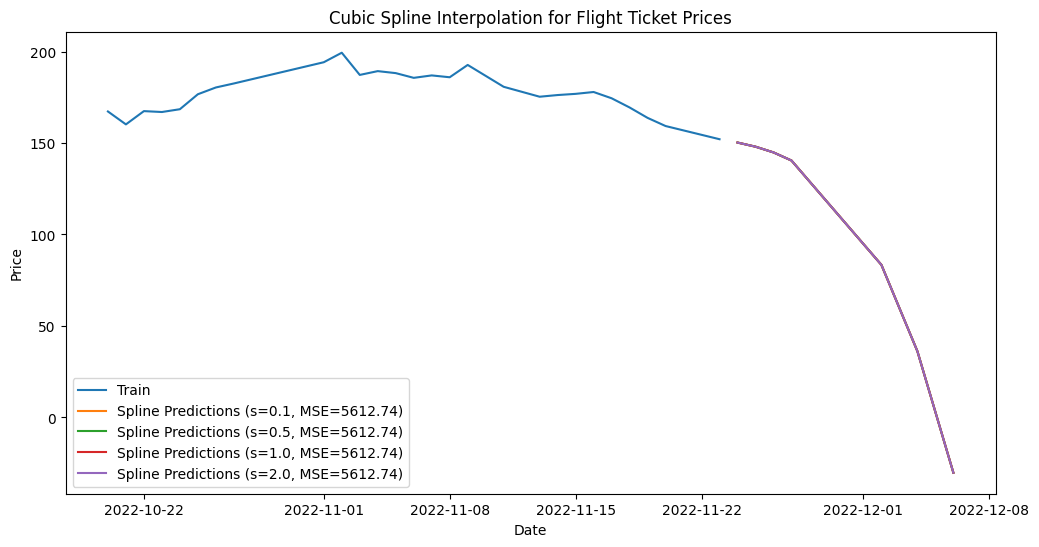

In [27]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Assuming 'train' is your training data with 'price' and 'test' is your test data

# Adjust the smoothing parameter 's' to find the best fit
s_values = [0.1, 0.5, 1.0, 2.0]  # Example values, adjust as needed

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['price'], label='Train')

for s_value in s_values:
    # Fit a cubic spline to the training data
    spline = CubicSpline(train.index, train['price'], bc_type='natural')

    # Generate interpolated values for the test set
    spline_predictions = spline(test.index)

    # Evaluate the spline model
    spline_mse = mean_squared_error(test['price'], spline_predictions)

    # Visualize the results
    label = f'Spline Predictions (s={s_value}, MSE={spline_mse:.2f})'
    plt.plot(test.index, spline_predictions, label=label)

plt.title('Cubic Spline Interpolation for Flight Ticket Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


##### **XGBoost**

Reference: https://machinelearningmastery.com/xgboost-for-time-series-forecasting/

**Converting time series forecasting into supervised learning**

- We can effectively convert a time series data into a supervised learning data by the sliding window technique

In [63]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  df = pd.DataFrame(data)
  cols = list()

  # input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
  # forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
    cols.append(df.shift(-i))
  # put it all together
  agg = pd.concat(cols, axis=1)
  # drop rows with NaN values
  if dropnan:
    agg.dropna(inplace=True)

  agg.columns = ['i','price0','i','price1']

  return agg.reset_index()[['price0','price1']]

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [97]:
train,test = series_to_supervised(train), series_to_supervised(test)

In [94]:
import xgboost
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, test):
  # transform list into array
  train = np.array(train)
  # split into input and output columns
  trainX, trainy = train[:, :-1], train[:, -1]
  print(trainX, trainy)

  # fit model
  model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
  model.fit(trainX, trainy)

  # make a one-step prediction
  test = np.array(test)
  testX, testy = test[:, :-1], test[:, -1]
  yhat = model.predict(testX)
  return yhat

In [95]:
xgboost_forecast(train, test)

[[160.17129015]
 [167.42446126]
 [166.93657998]
 [168.46475006]
 [176.64548577]
 [180.34796342]
 [182.5352628 ]
 [194.14444587]
 [199.34225482]
 [187.20854753]
 [189.28419216]
 [188.19321662]
 [185.60853833]
 [186.93924153]
 [185.92946175]
 [192.66553299]
 [180.72026191]
 [175.29025622]
 [176.21165699]
 [176.86039946]
 [177.87297923]
 [174.44566462]
 [169.41726189]
 [163.73352012]
 [159.27692604]] [167.42446126 166.93657998 168.46475006 176.64548577 180.34796342
 182.5352628  194.14444587 199.34225482 187.20854753 189.28419216
 188.19321662 185.60853833 186.93924153 185.92946175 192.66553299
 180.72026191 175.29025622 176.21165699 176.86039946 177.87297923
 174.44566462 169.41726189 163.73352012 159.27692604 152.06597975]


array([152.06721, 152.06721, 152.06721, 152.06721, 152.06721],
      dtype=float32)

In [98]:
# transform list into array
train = np.array(train)
# split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]

# fit model
model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(trainX, trainy)

# make a one-step prediction
test = np.array(test)
testX, testy = test[:, :-1], test[:, -1]
model.predict(testX)

array([152.06723, 152.06723, 152.06723, 152.06723], dtype=float32)

In [102]:
model.predict([120])

array([152.06723], dtype=float32)

In [101]:
test

array([[146.37687353, 141.5877723 ],
       [141.5877723 , 136.74643615],
       [136.74643615, 133.32732029],
       [133.32732029, 134.09440723]])

In [100]:
testX

array([[146.37687353],
       [141.5877723 ],
       [136.74643615],
       [133.32732029]])

## **Model Tuning and Evaluation**